In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv("dataset_phishing.csv")

In [6]:
dataset.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


## 1. Statistics of the dataset

### The provided dataset includes 11430 URLs with 50% legitimate and 50% phishing websites. <br>
### Each URL observation has 87 extracted **numerical** features, with 56 from the structure and syntax of URLs, 24 from the corresponding content of their pages, and 7 from  querying external services.

### Check whether there is any missing value in the dataset -- No missing value

In [7]:
for column in dataset.columns:  
    if sum(dataset[column].isnull()) > 0:
        print(column)

In [8]:
dataset.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


### If all of the values in the sample are identical, the sample standard deviation will be zero. Therefore, we might get rid of those columns

In [9]:
identical_columns = []
for column in dataset.describe().columns:
    if dataset.describe().loc['std',column] == 0 :
        identical_columns.append(column)
identical_columns

['nb_or',
 'ratio_nullHyperlinks',
 'ratio_intRedirection',
 'ratio_intErrors',
 'submit_email',
 'sfh']

In [10]:
for column in identical_columns:
    del dataset[column]

### Identify which columns are numeric variables and which columns are boolean variables

In [11]:
bool_cols = [col for col in dataset.iloc[:,1:-1]
             if np.isin(dataset[col].dropna().unique(), [0, 1]).all()]

In [12]:
numeric_cols = []
for column in dataset.iloc[:,1:-1].columns:
    if column not in bool_cols:
        numeric_cols.append(column)

In [13]:
# print(numeric_cols)

In [14]:
# dataset[bool_cols].astype('object').describe()

In [15]:
# dataset[numeric_cols].describe()

## 2. Encode 'status' as target
### legitimate as 1; phishing as 0

In [16]:
dataset['target'] = pd.get_dummies(dataset['status'])['legitimate'].astype('int')

In [17]:
# dataset

In [18]:
del dataset['status']

In [19]:
# phishing_df = dataset[dataset['target'] == 0]
# legitimate_df = dataset[dataset['target'] == 1]

In [20]:
corr = dataset.corr()
corr_target = corr['target']
high_corr = {}
index = 0
for i in corr_target:
          if abs(i) > 0.2:
                    high_corr.update({corr.index[index]:i})
          index+=1
high_corr


{'length_url': -0.24858046741991816,
 'length_hostname': -0.23832240376368663,
 'ip': -0.3216977823874091,
 'nb_dots': -0.20702877302594613,
 'nb_qm': -0.2943190708457299,
 'nb_eq': -0.23338630384578968,
 'nb_slash': -0.24226996017533975,
 'nb_www': 0.4434676875128608,
 'ratio_digits_url': -0.35639457016260295,
 'ratio_digits_host': -0.2243349271958068,
 'tld_in_subdomain': -0.20888415296656931,
 'prefix_suffix': -0.21468073790291659,
 'shortest_word_host': -0.2230840424088336,
 'longest_words_raw': -0.20014657829049384,
 'longest_word_path': -0.21270911546421975,
 'phish_hints': -0.33539273771565076,
 'nb_hyperlinks': 0.34262829003785156,
 'ratio_intHyperlinks': 0.24398212184603427,
 'empty_title': -0.20704280783941809,
 'domain_in_title': -0.3428069729938349,
 'domain_age': 0.33188908389604077,
 'google_index': -0.7311708381262628,
 'page_rank': 0.5111371436644992,
 'target': 1.0}

In [21]:
data_clear = dataset[high_corr.keys()]
data_clear.shape

(11430, 24)

In [22]:
data_clear

,length_url,length_hostname,ip,nb_dots,nb_qm,nb_eq,nb_slash,nb_www,ratio_digits_url,ratio_digits_host,...,longest_word_path,phish_hints,nb_hyperlinks,ratio_intHyperlinks,empty_title,domain_in_title,domain_age,google_index,page_rank,target
0,37,19,0,3,0,0,3,1,0.000000,0.000000,...,6,0,17,0.529412,0,0,-1,1,4,1
1,77,23,1,1,0,0,5,0,0.220779,0.000000,...,32,0,30,0.966667,0,1,5767,1,2,0
2,126,50,1,4,1,3,5,0,0.150794,0.000000,...,17,0,4,1.000000,0,1,4004,1,0,0
3,18,11,0,2,0,0,2,0,0.000000,0.000000,...,0,0,149,0.973154,0,1,-1,0,3,1
4,55,15,0,2,0,0,5,1,0.000000,0.000000,...,11,0,102,0.470588,0,0,8175,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,4,1,0.000000,0.000000,...,11,0,199,0.884422,0,0,5396,0,6,1
11426,84,18,0,5,1,1,5,1,0.023810,0.000000,...,8,0,3,1.000000,0,1,6728,1,0,0
11427,105,16,1,2,1,1,5,1,0.142857,0.000000,...,15,0,68,0.470588,0,0,8515,1,10,1
11428,38,30,0,2,0,0,3,1,0.000000,0.000000,...,0,0,32,0.375000,0,1,2836,0,4,1


In [25]:
y = data_clear['target']
X = data_clear.drop('target',axis=1)
X.shape, y.shape

((11430, 23), (11430,))

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 2)
X_train.shape, X_test.shape

((9144, 23), (2286, 23))

In [33]:
# Convert the values to 0 and 1
from sklearn import preprocessing
X_train = preprocessing.MinMaxScaler().fit_transform(X_train.values)
X_test =  preprocessing.MinMaxScaler().fit_transform(X_test.values)

## PCA

In [34]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [40]:
# pca=PCA(n_components=6)
# pca.fit(X_train)
# X_train_pca=pca.transform(X_train)
# X_test_pca=pca.transform(X_test)

## SVM

In [43]:
# svm
svm= SVC(kernel='poly',random_state=2)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='poly', random_state=2)

In [44]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.943
SVM : Accuracy on test Data: 0.939


In [37]:
# svm
svm= SVC(kernel='poly', degree=9, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(degree=9, kernel='poly', random_state=12)

In [38]:

#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.949
SVM : Accuracy on test Data: 0.927


### logistic regression

In [35]:
logis_fit = LogisticRegression(random_state=2)
logis_fit.fit(X_train,y_train)
predic_log_test = logis_fit.predict(X_test)
predic_log_train = logis_fit.predict(X_train)
acc_train_log = accuracy_score(y_train,predic_log_train)
acc_test_log= accuracy_score(y_test,predic_log_test)
print("logistic: Accuracy on training Data: {:.3f}".format(acc_train_log))
print("logistic : Accuracy on test Data: {:.3f}".format(acc_test_log))

logistic: Accuracy on training Data: 0.926
logistic : Accuracy on test Data: 0.920


## 3. Visualization of the dataset

### 3.1 Histograms

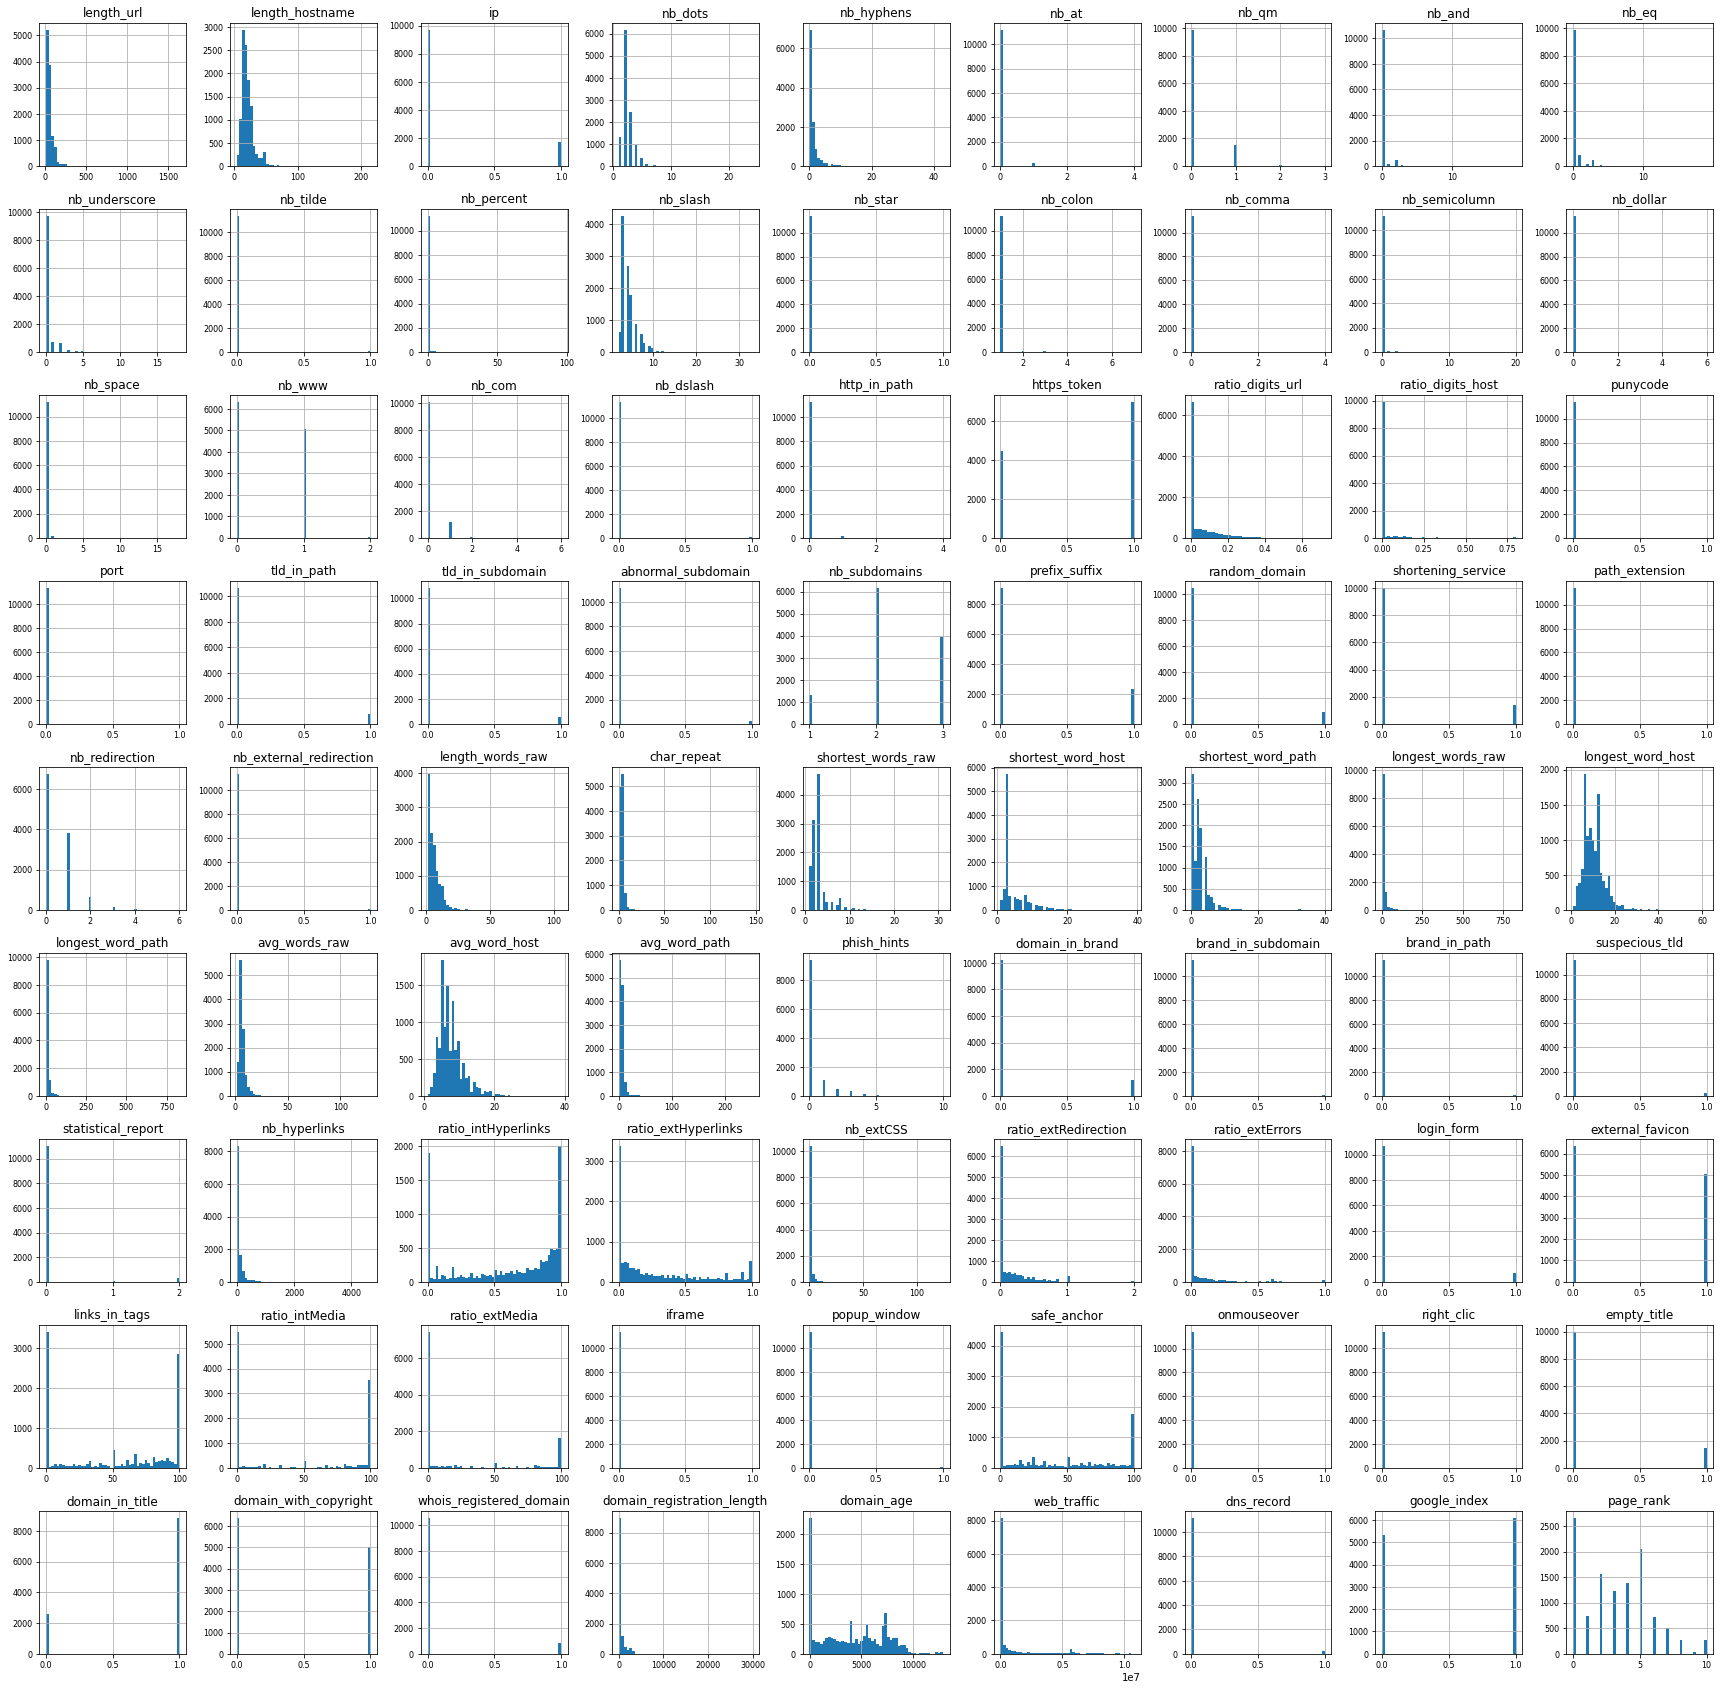

In [19]:
# dataset.iloc[:,:-1].hist(figsize=(30, 30), bins=50,xlabelsize=8, ylabelsize=8);

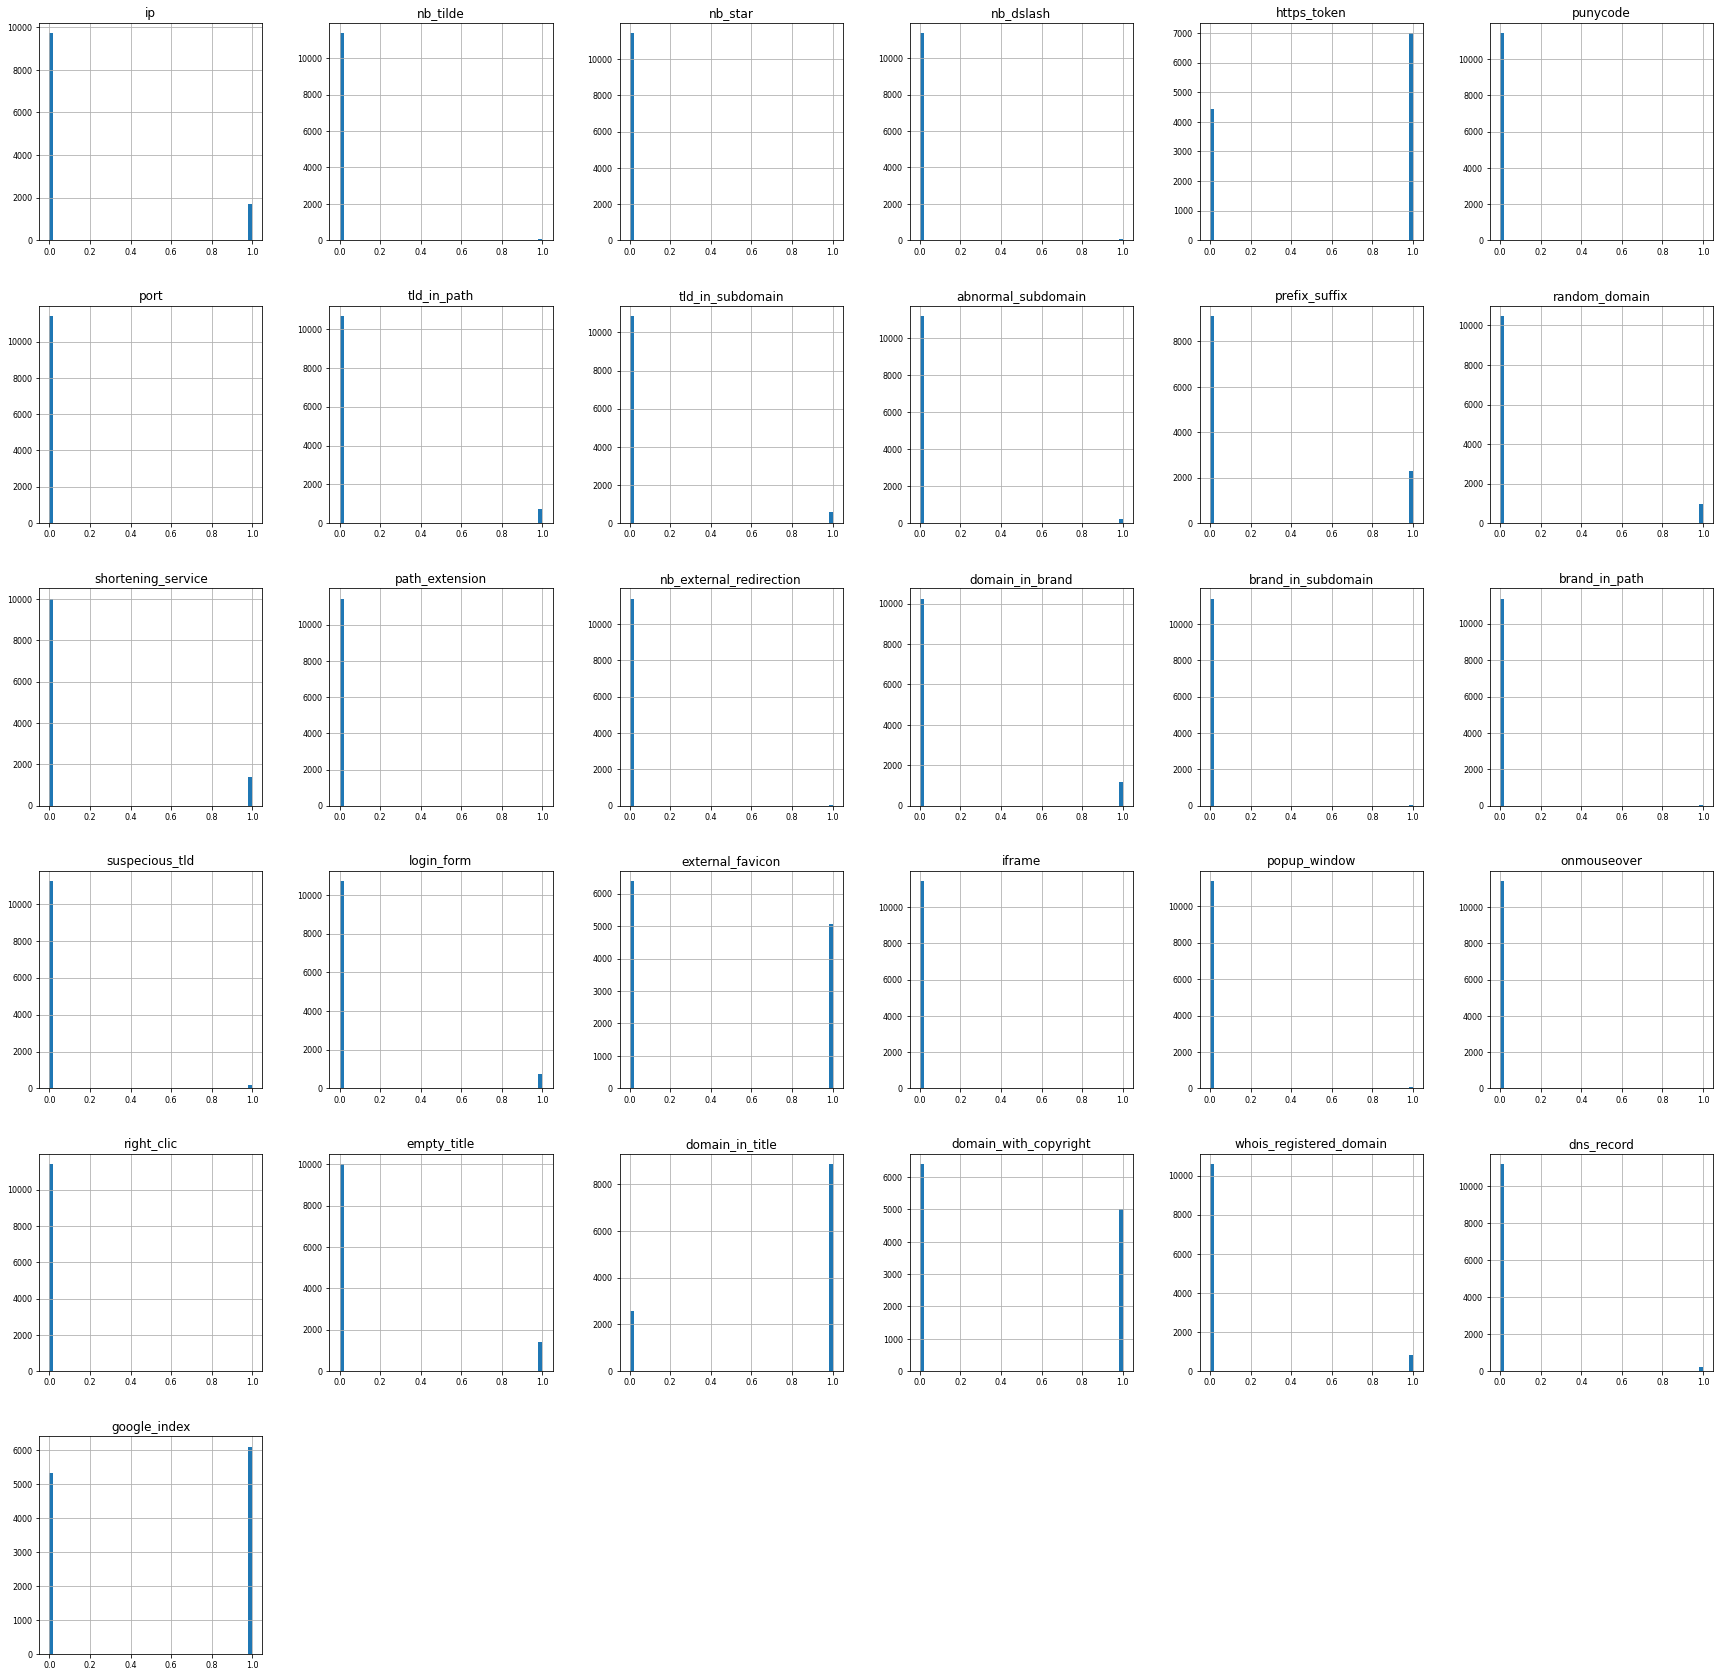

In [20]:
# dataset[bool_cols].hist(figsize=(30, 30), bins=50,xlabelsize=8, ylabelsize=8);

In [21]:
dataset[numeric_cols].hist(figsize=(30, 30), bins=50,xlabelsize=8, ylabelsize=8);

Error in callback <function flush_figures at 0x1212a96c0> (for post_execute):


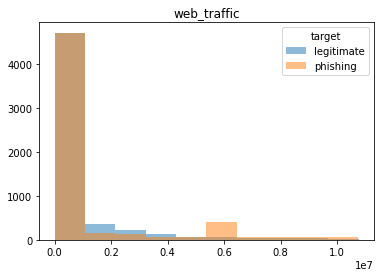

In [ ]:
i = 'web_traffic'
#define points values by group
A = dataset.loc[dataset['target'] == 1, i]
B = dataset.loc[dataset['target'] == 0, i]

#add three histograms to one plot
plt.hist(A, alpha=0.5, label='legitimate')
plt.hist(B, alpha=0.5, label='phishing')

#add plot title and axis labels
plt.title(i)

#add legend
plt.legend(title='target')

#display plot
plt.show()

In [ ]:
# for i in dataset.iloc[:,1:-1].columns:
#     #define points values by group
#     A = dataset.loc[dataset['target'] == 1, i]
#     B = dataset.loc[dataset['target'] == 0, i]

#     #add three histograms to one plot
#     plt.hist(A, alpha=0.5, label='legitimate')
#     plt.hist(B, alpha=0.5, label='phishing')

#     #add plot title and axis labels
#     plt.title(i)

#     #add legend
#     plt.legend(title='target')

#     #display plot
#     plt.show()

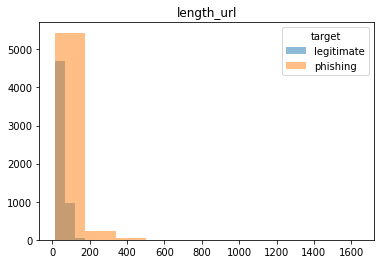

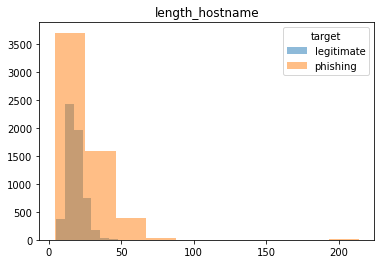

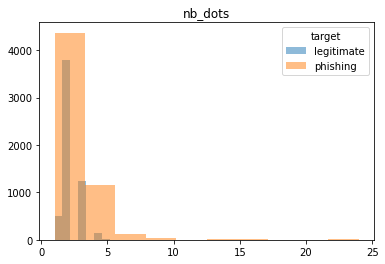

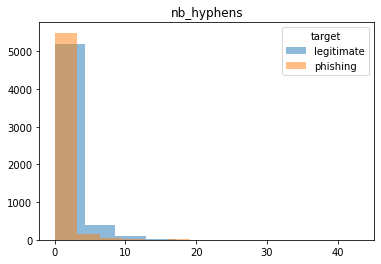

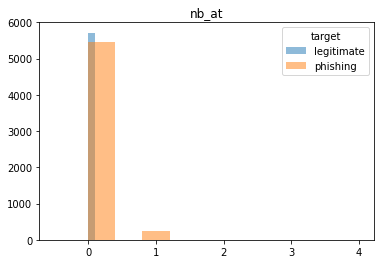

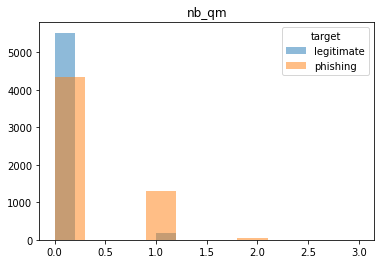

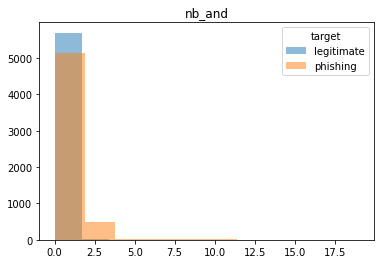

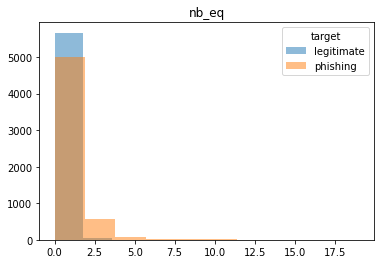

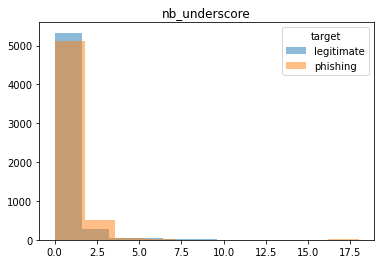

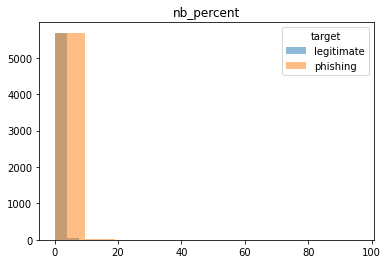

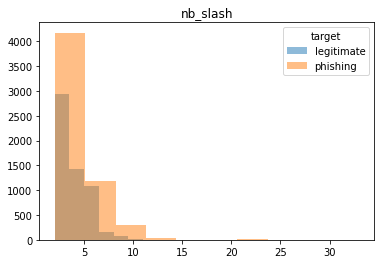

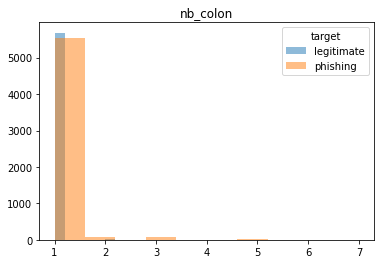

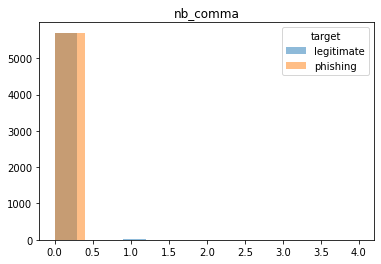

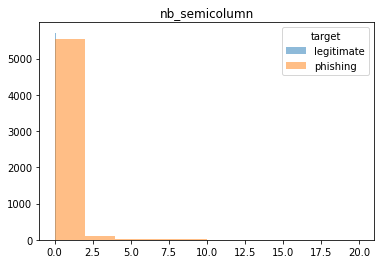

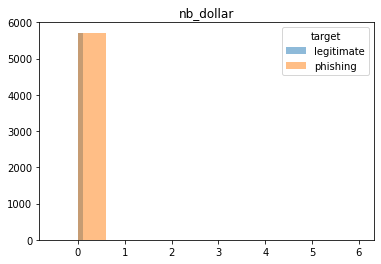

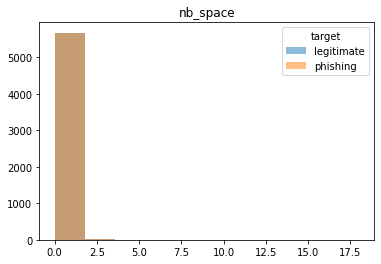

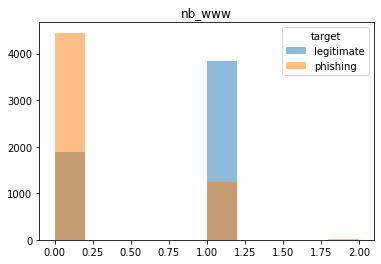

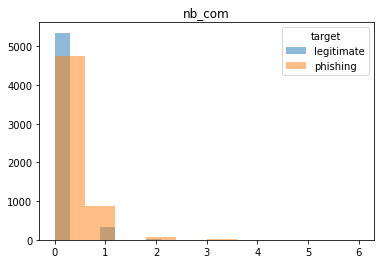

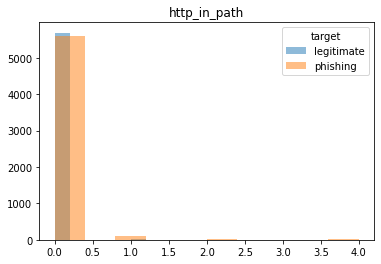

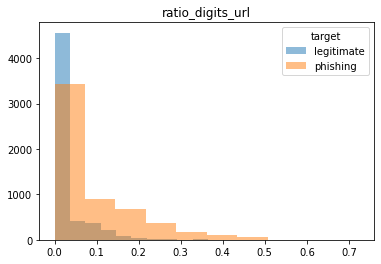

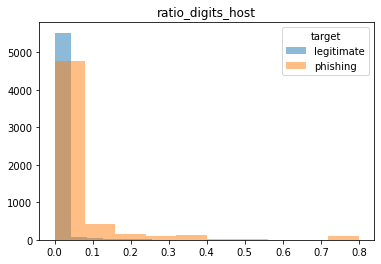

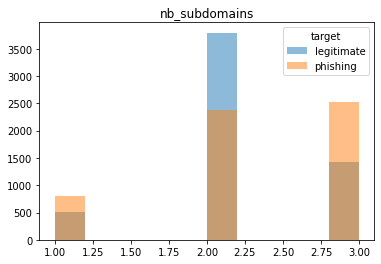

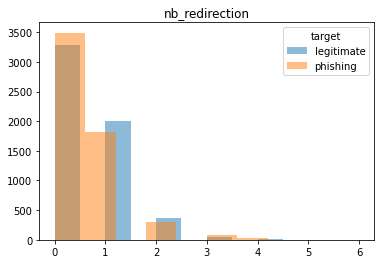

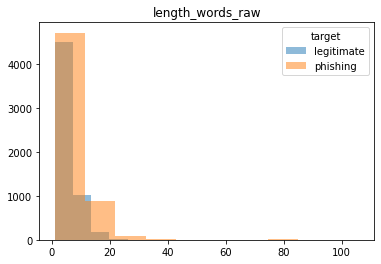

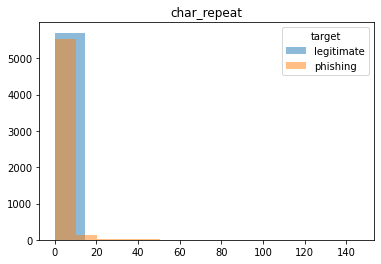

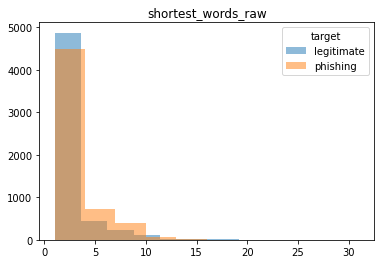

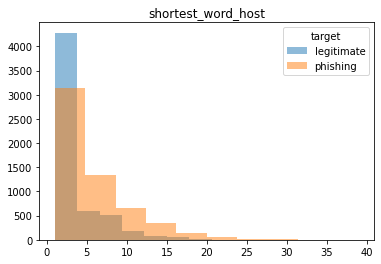

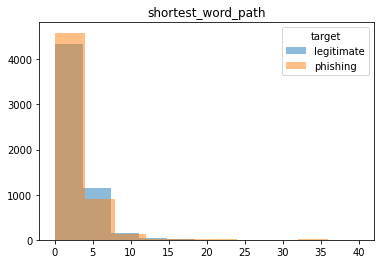

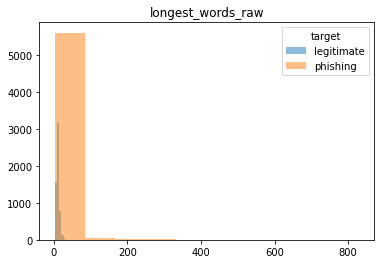

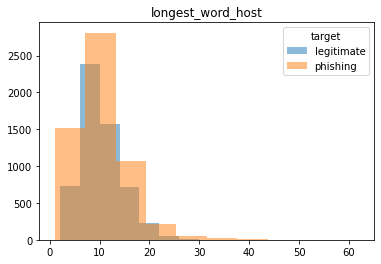

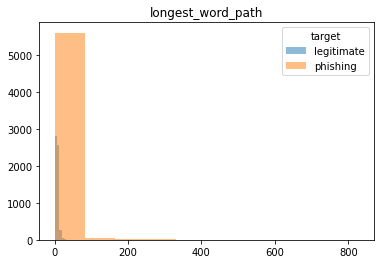

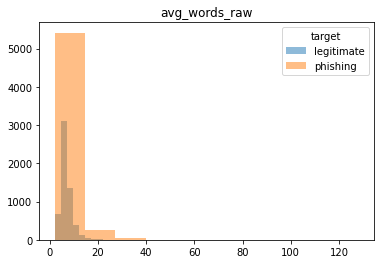

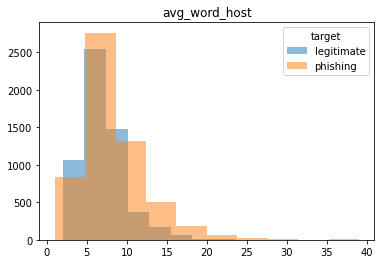

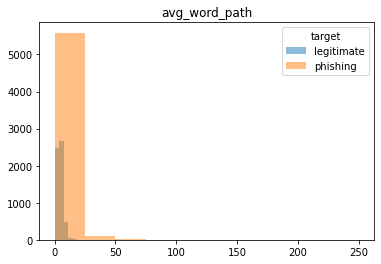

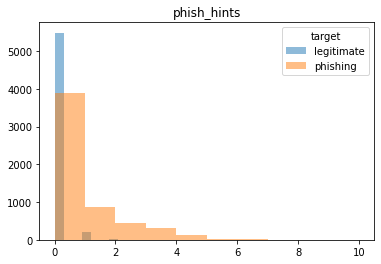

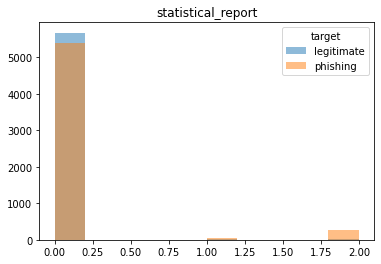

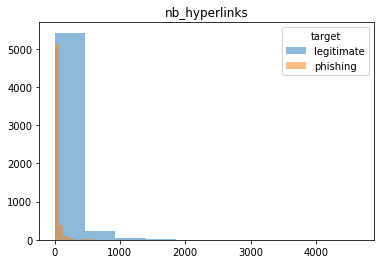

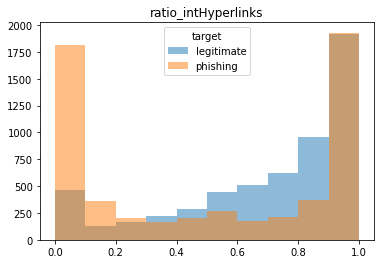

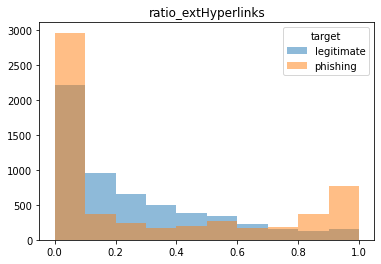

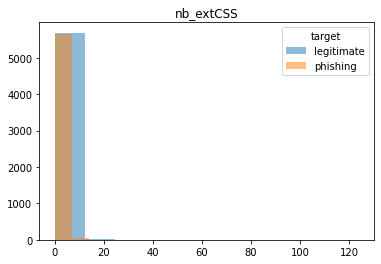

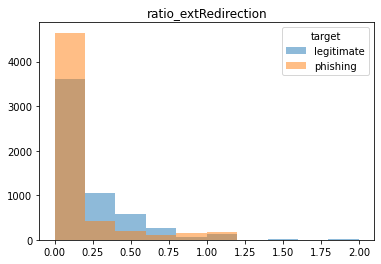

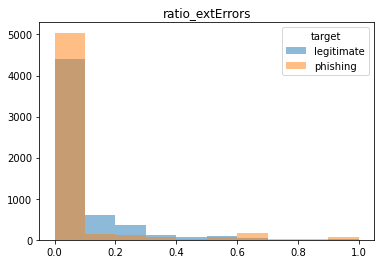

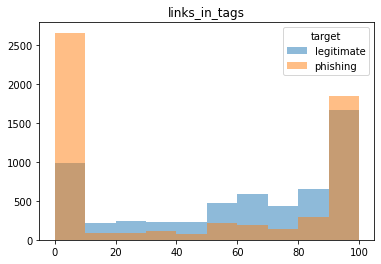

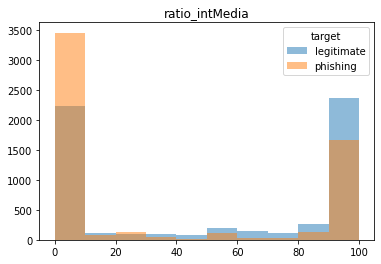

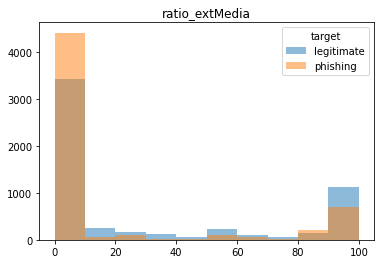

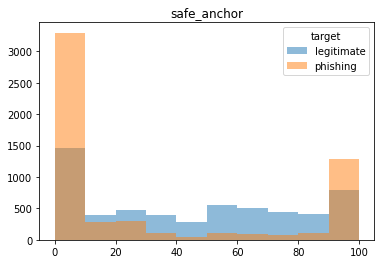

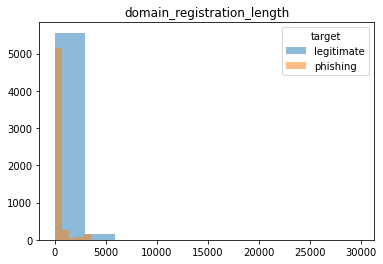

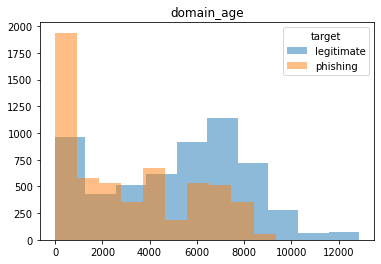

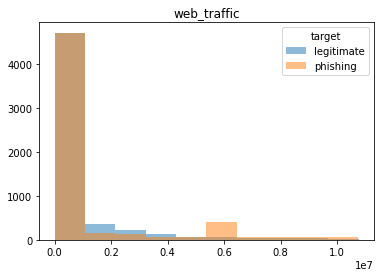

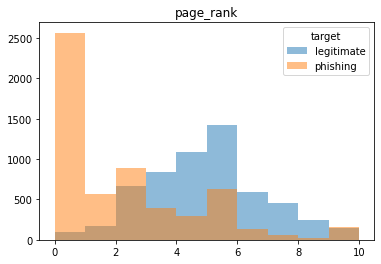

In [ ]:
# for i in dataset[numeric_cols].columns:
#     #define points values by group
#     A = dataset.loc[dataset['target'] == 1, i]
#     B = dataset.loc[dataset['target'] == 0, i]

#     #add three histograms to one plot
#     plt.hist(A, alpha=0.5, label='legitimate')
#     plt.hist(B, alpha=0.5, label='phishing')

#     #add plot title and axis labels
#     plt.title(i)

#     #add legend
#     plt.legend(title='target')

#     #display plot
#     plt.show()

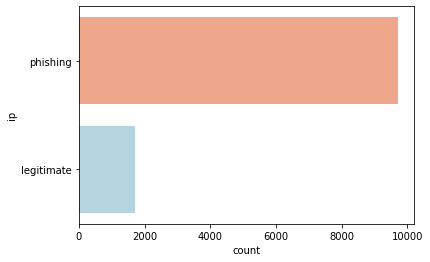

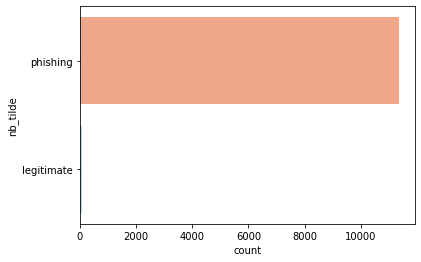

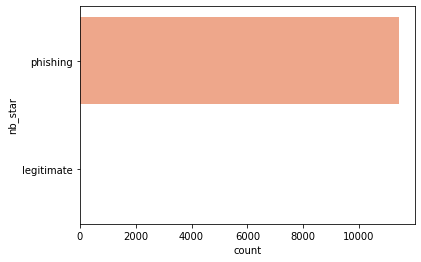

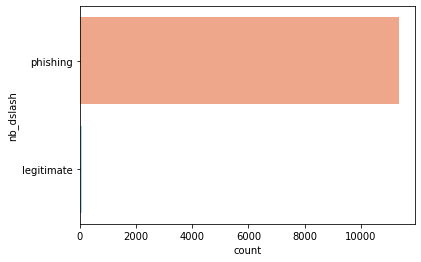

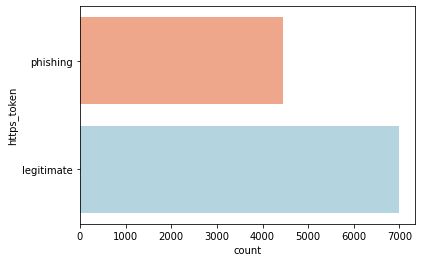

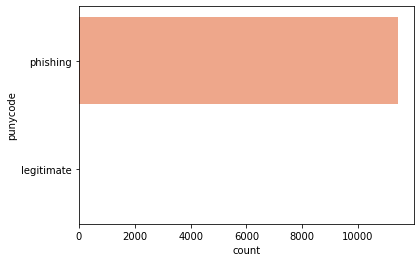

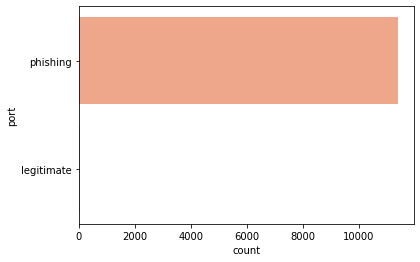

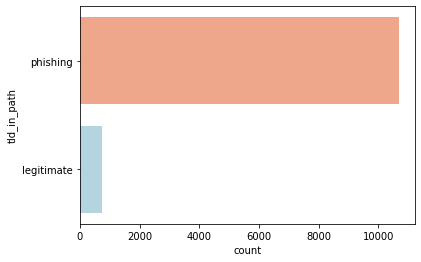

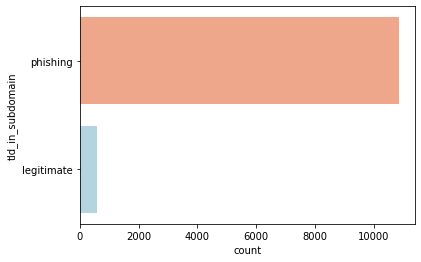

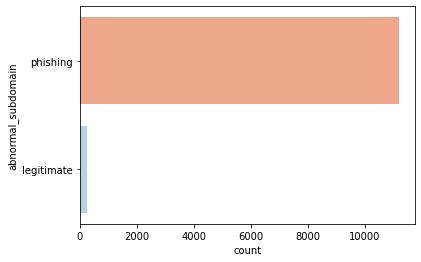

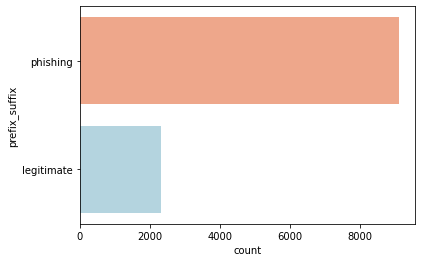

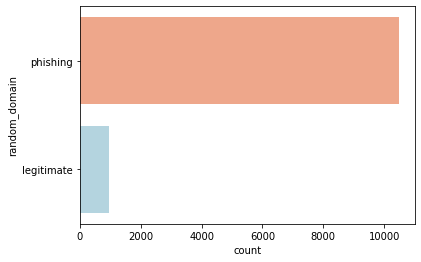

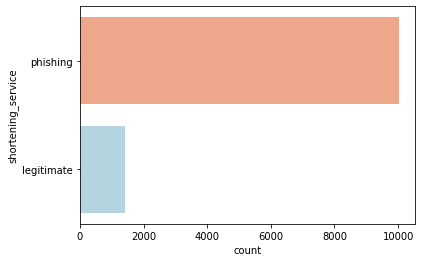

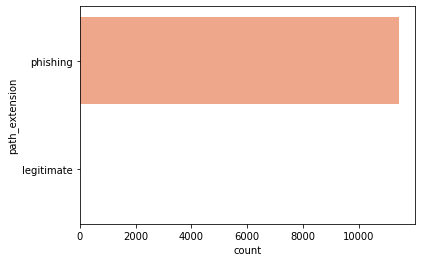

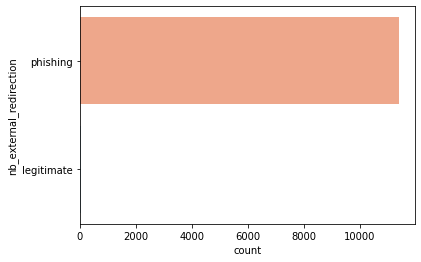

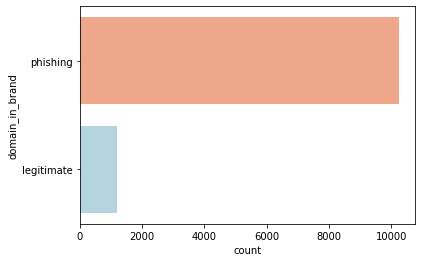

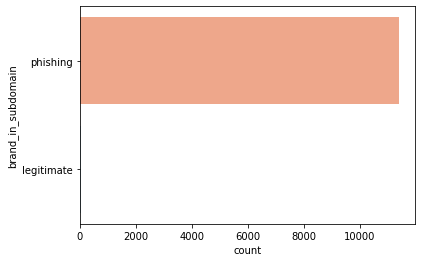

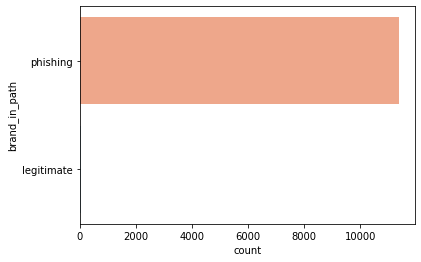

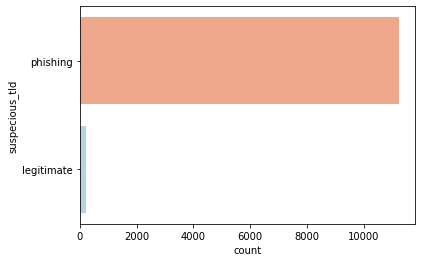

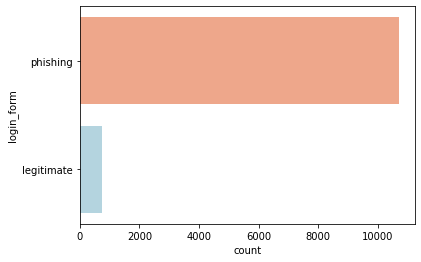

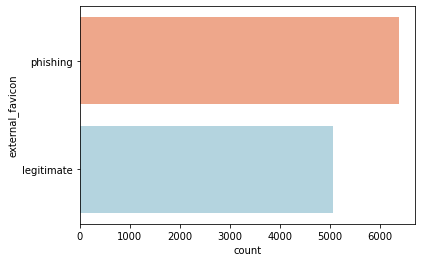

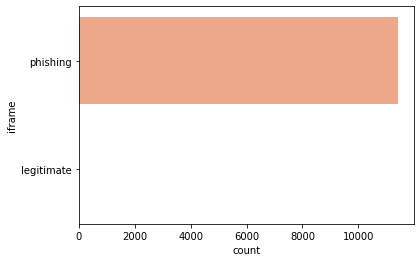

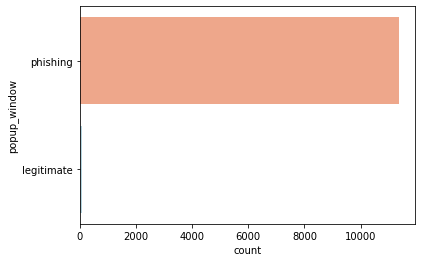

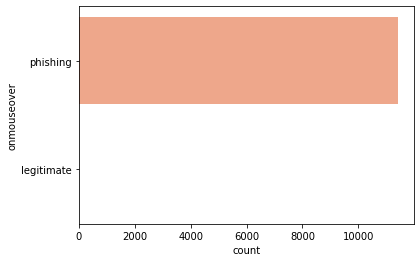

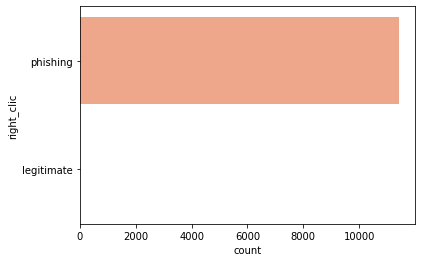

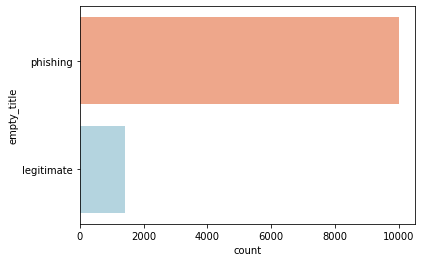

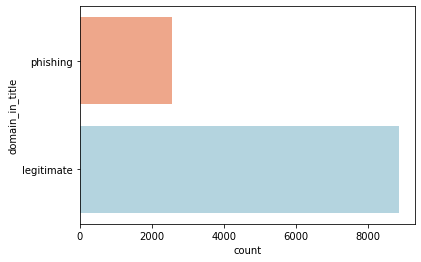

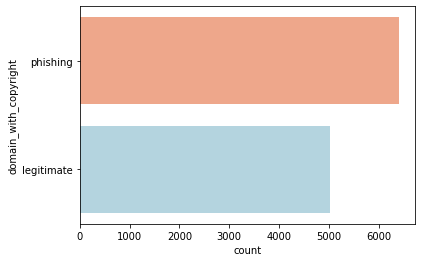

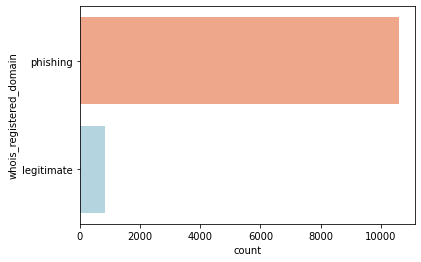

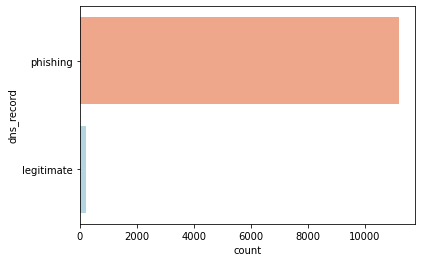

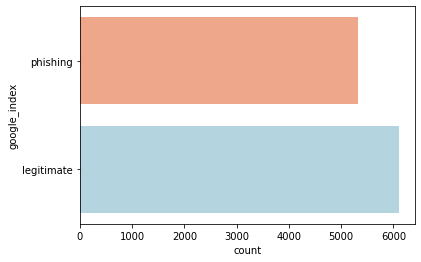

In [ ]:
# my_pal = {1: "lightblue", 0: "lightsalmon"}
# for i in dataset[bool_cols].columns:
#         fig = plt.figure()
#         ax = fig.add_subplot(111)
#         sns.countplot(y=i, data=dataset,palette=my_pal)
#         ax.set_yticklabels(['phishing', 'legitimate'])
#         plt.show()

In [ ]:
dataset.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyper

In [ ]:
# for i in dataset[bool_cols].columns:
#     #define points values by group
#     A = dataset.loc[dataset['target'] == 1, i]
#     B = dataset.loc[dataset['target'] == 0, i]

#     #add three histograms to one plot
#     plt.hist(A, alpha=0.5, label='legitimate')
#     plt.hist(B, alpha=0.5, label='phishing')

#     #add plot title and axis labels
#     plt.title(i)

#     #add legend
#     plt.legend(title='target')

#     #display plot
#     plt.show()

### 3.2 Boxplots

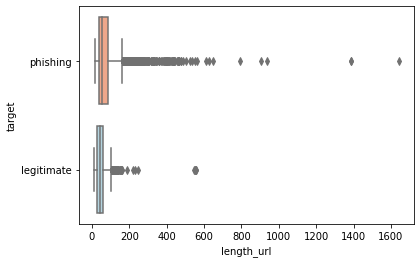

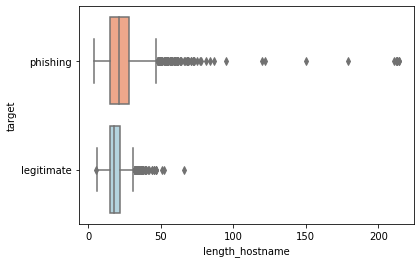

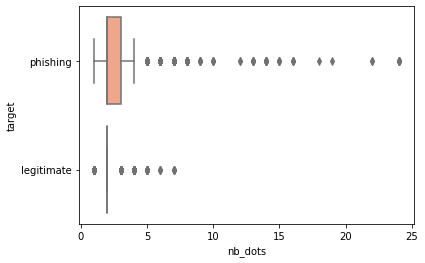

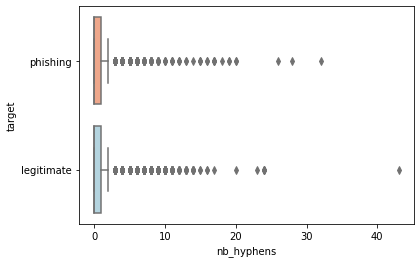

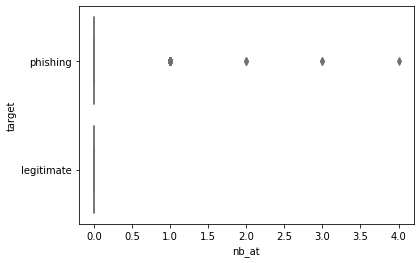

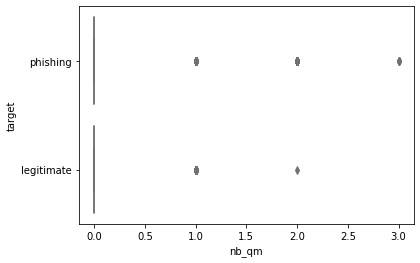

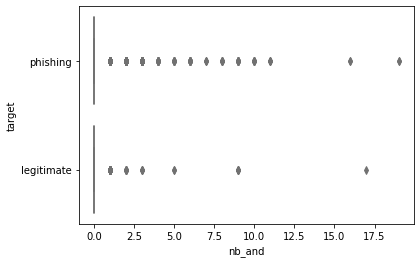

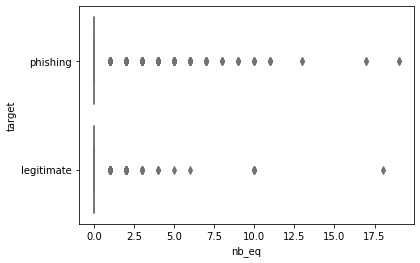

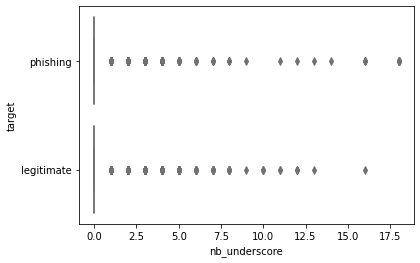

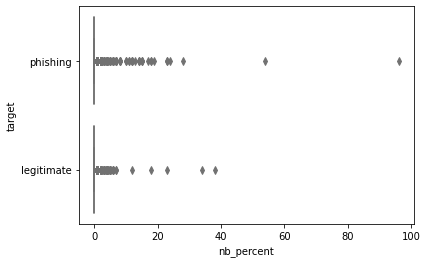

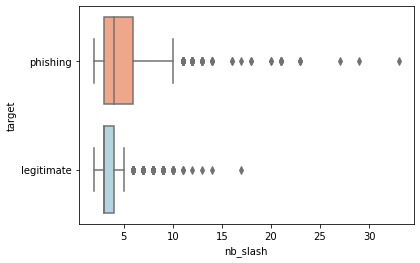

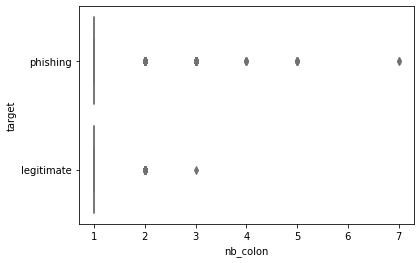

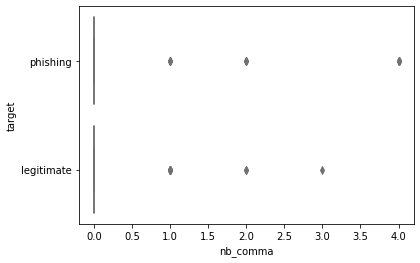

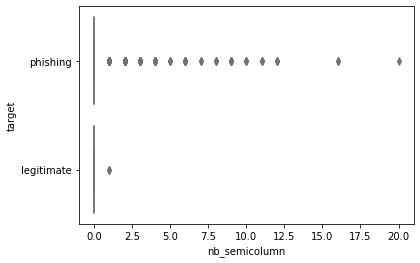

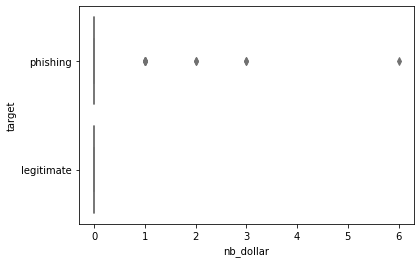

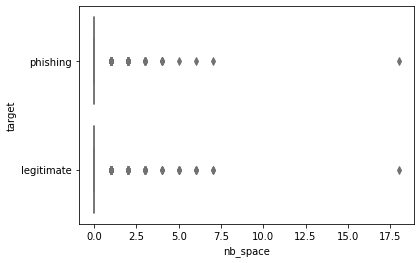

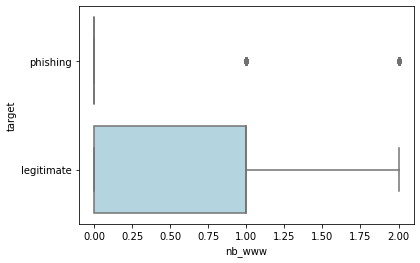

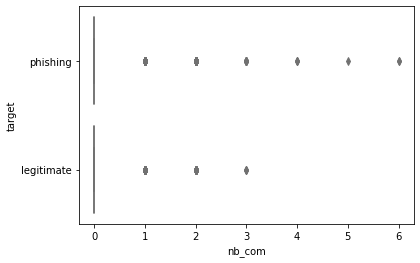

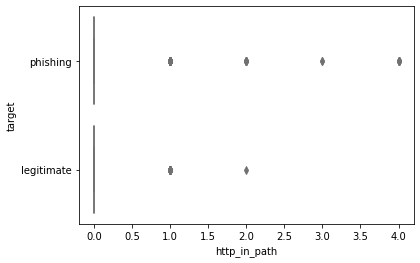

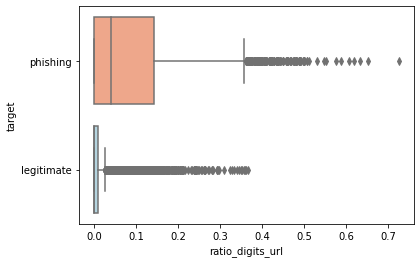

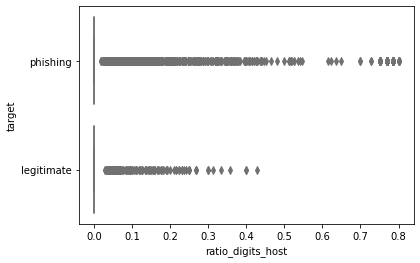

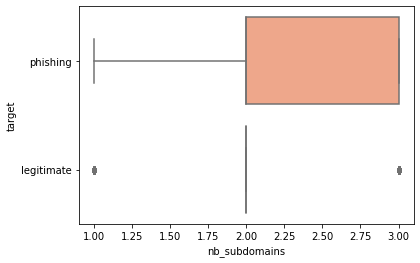

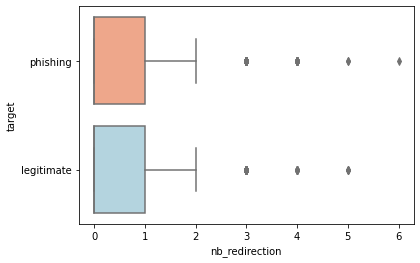

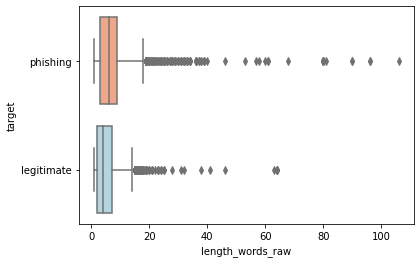

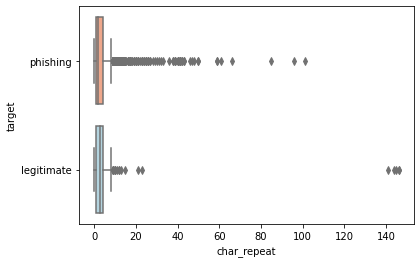

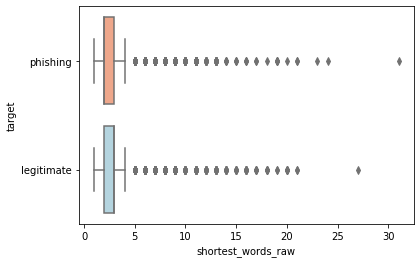

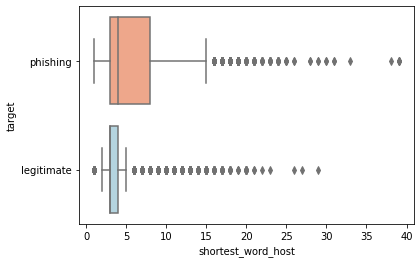

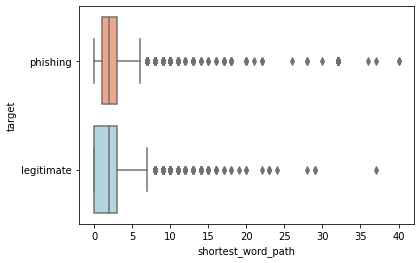

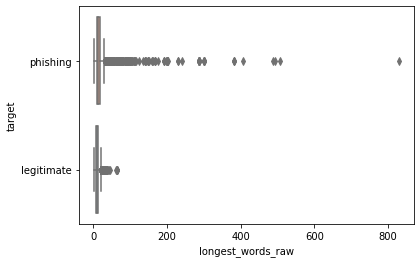

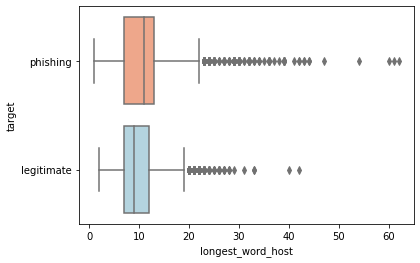

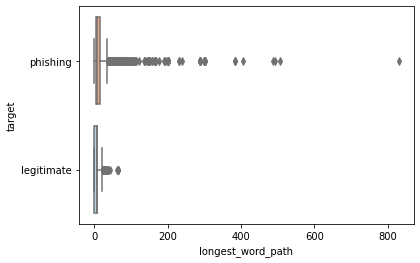

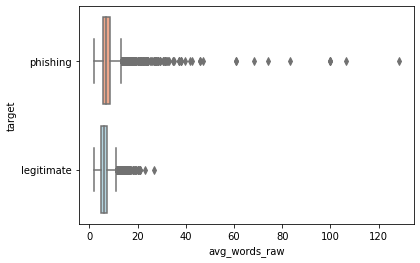

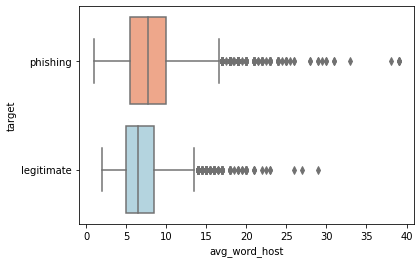

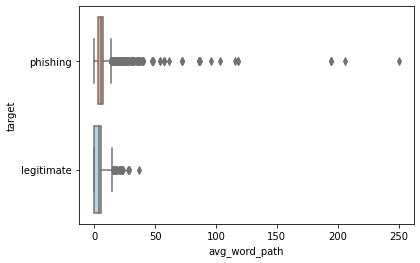

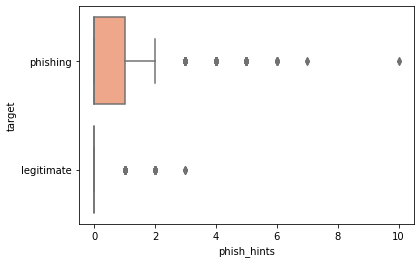

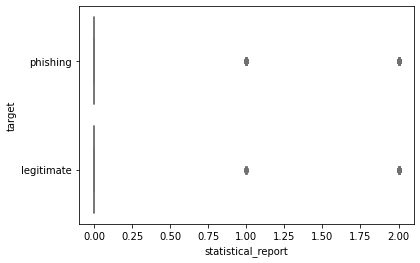

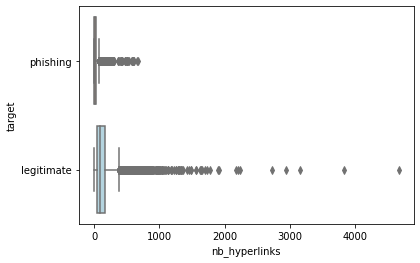

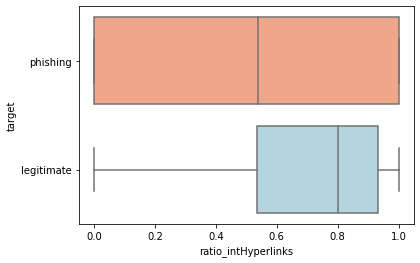

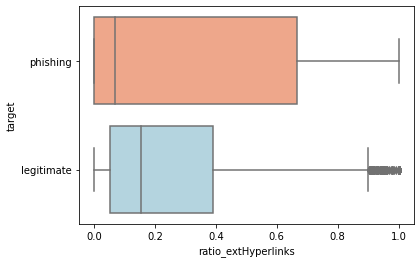

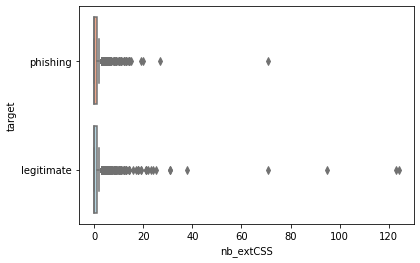

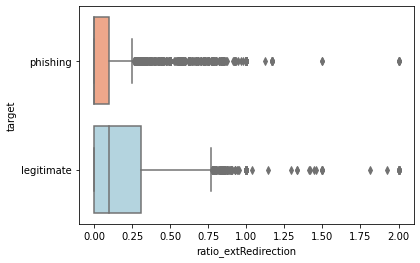

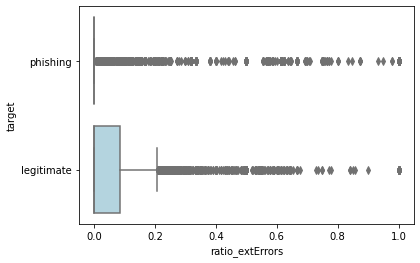

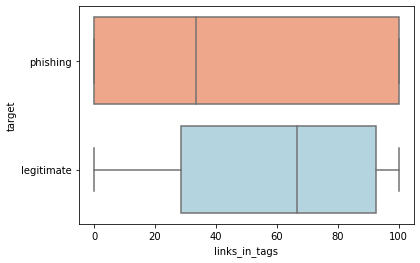

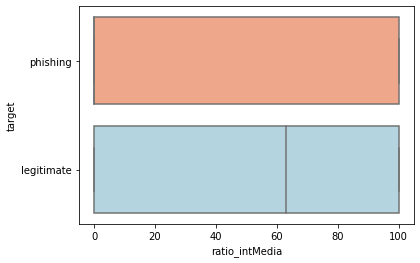

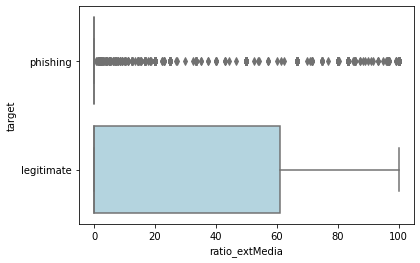

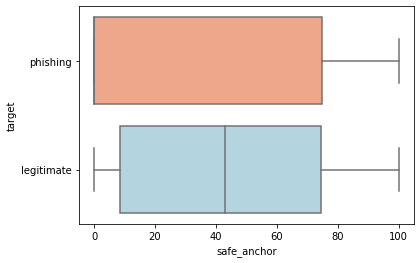

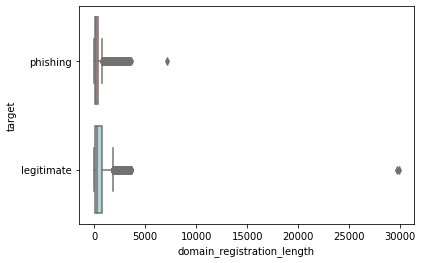

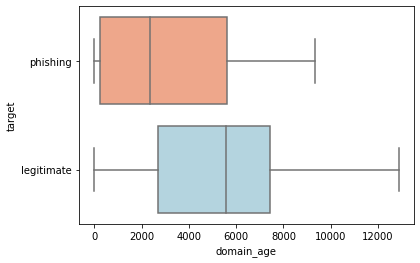

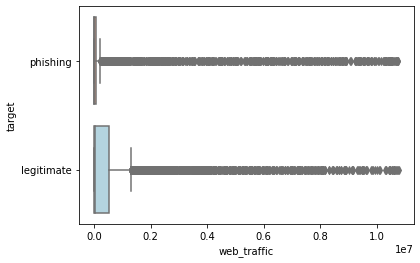

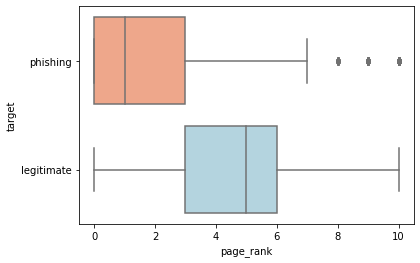

In [ ]:
# my_pal = {1: "lightblue", 0: "lightsalmon"}
# for col in numeric_cols:
#     fig = plt.figure()
#     ax = fig.add_subplot(111)
#     sns.boxplot(y = dataset['target'].astype('category'), x = col, data=dataset, palette=my_pal)
#     ax.set_yticklabels(['phishing', 'legitimate'])
#     plt.show()

### 3.3 Heatmap of correlations

In [ ]:
corr = dataset[numeric_cols].corr()

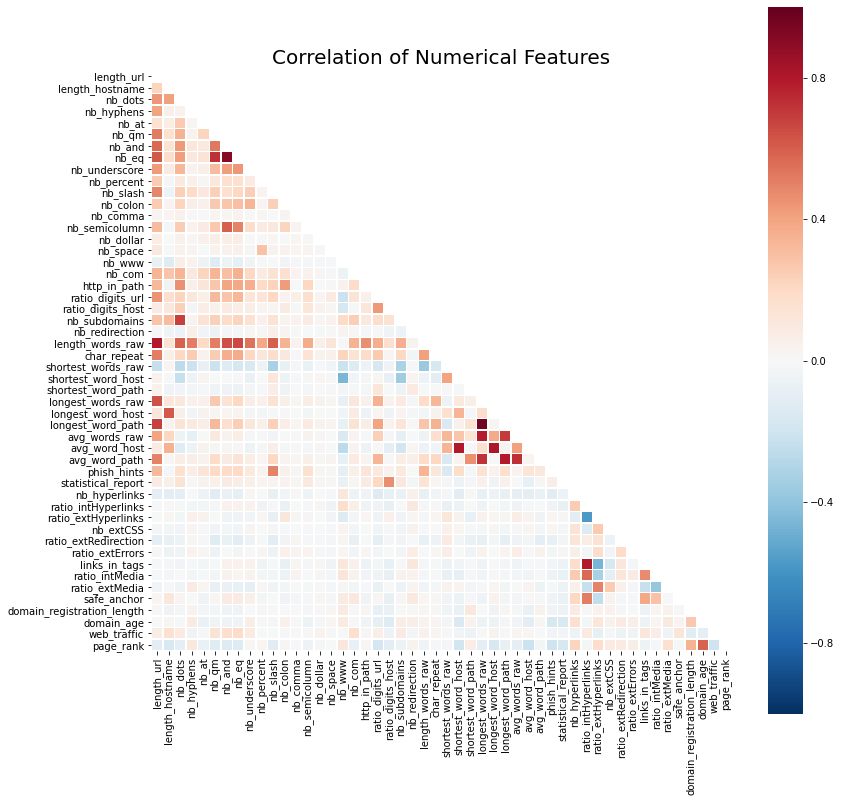

In [ ]:
fig = plt.figure(figsize=(13,13))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='RdBu_r', 
            square=True, linewidths=.5,vmax=1, vmin=-1)
plt.title('Correlation of Numerical Features', fontsize=20)
plt.show()